In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

C:\Users\Sang\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Sang\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
from tensorflow.keras.preprocessing import sequence
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [4]:
x_train.shape

(25000, 100)

In [5]:
y_test.shape

(25000,)

In [6]:
y_train.shape

(25000,)

In [7]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
y_test_one_hot.shape

(25000, 2)

In [10]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.SimpleRNN(32))
# of parameters = 64*32+32*32+32 = 3104
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                3104      
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 643,666
Trainable params: 643,666
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32, return_sequences=False)) #마지막 hidden state 벡터 정보만 다음 층으로 넘어감
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 322,146
Trainable params: 322,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [14]:
history=model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 65ms/step - loss: 0.5017 - acc: 0.7469 - val_loss: 0.4763 - val_acc: 0.8028
Epoch 2/10
157/157 [==============================] - 10s 63ms/step - loss: 0.2945 - acc: 0.8792 - val_loss: 0.3982 - val_acc: 0.8242
Epoch 3/10
157/157 [==============================] - 10s 63ms/step - loss: 0.1693 - acc: 0.9374 - val_loss: 0.4678 - val_acc: 0.8118
Epoch 4/10
157/157 [==============================] - 10s 64ms/step - loss: 0.0723 - acc: 0.9760 - val_loss: 0.5726 - val_acc: 0.8316
Epoch 5/10
157/157 [==============================] - 10s 64ms/step - loss: 0.0283 - acc: 0.9914 - val_loss: 0.7552 - val_acc: 0.8274
Epoch 6/10
157/157 [==============================] - 10s 63ms/step - loss: 0.0109 - acc: 0.9968 - val_loss: 0.8736 - val_acc: 0.8036
Epoch 7/10
157/157 [==============================] - 10s 63ms/step - loss: 0.0062 - acc: 0.9980 - val_loss: 0.9959 - val_acc: 0.7978
Epoch 8/10
157/157 [==============================] - 10s 63ms

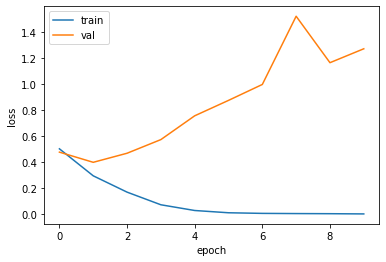

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 6s 7ms/step - loss: 1.3532 - acc: 0.7678


In [10]:
print('test_acc:', test_acc)

test_acc: 0.84544
